Slope: [[1.88971497 5.18072751]]
Intercept: [-6.64894889]
Mean squared error: 13.225568467205658
Root mean squared error: 3.6366974670991894


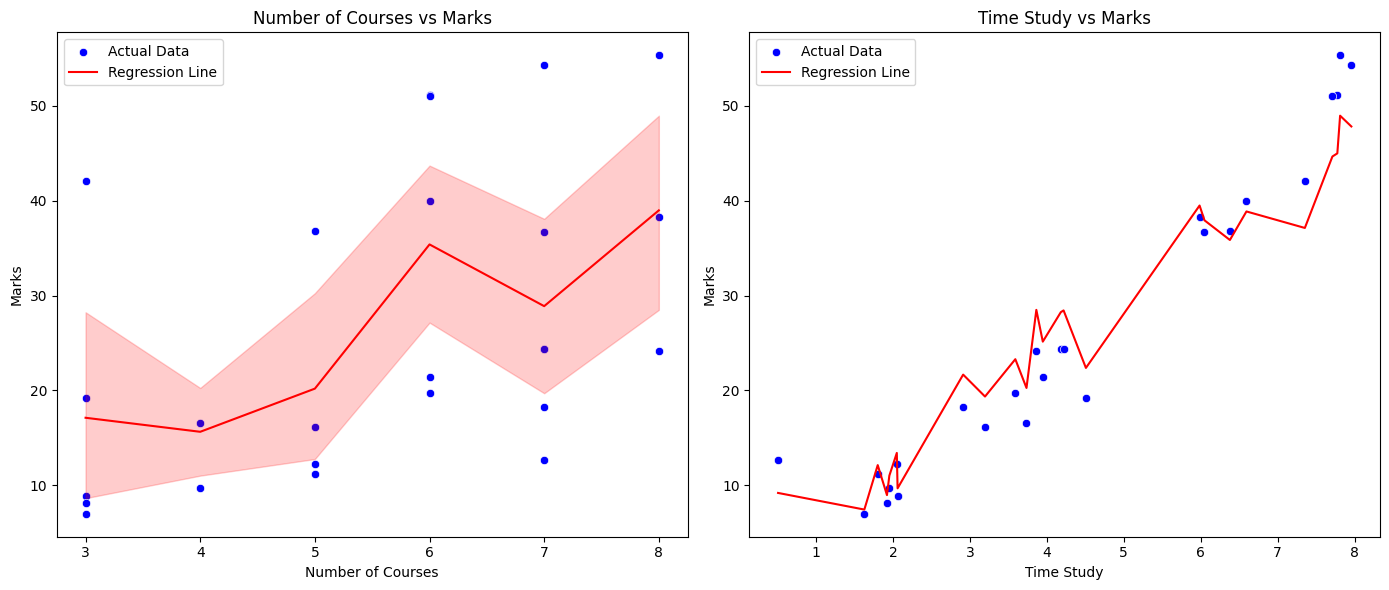

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


marks = pd.read_csv('Student_Marks.csv')
marks = marks.dropna()


x = marks[["number_courses", "time_study"]]
y = marks["Marks"]


x = x.values
y = y.values.reshape(-1, 1)

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Model initialization and fitting
regression_model = LinearRegression().fit(x_train, y_train)


y_predicted = regression_model.predict(x_test)
mse = mean_squared_error(y_test, y_predicted)


print('Slope:', regression_model.coef_)
print('Intercept:', regression_model.intercept_)
print('Mean squared error:', mse)
print('Root mean squared error:', mse**(1/2.0))


fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Feature 1: number_courses
sns.scatterplot(x=x_test[:, 0], y=y_test.flatten(), ax=axs[0], label='Actual Data', color='blue')
sns.lineplot(x=x_test[:, 0], y=regression_model.predict(x_test)[:, 0], ax=axs[0], label='Regression Line', color='red')
axs[0].set_title('Number of Courses vs Marks')
axs[0].set_xlabel('Number of Courses')
axs[0].set_ylabel('Marks')
axs[0].legend()

# Feature 2: time_study
sns.scatterplot(x=x_test[:, 1], y=y_test.flatten(), ax=axs[1], label='Actual Data', color='blue')
sns.lineplot(x=x_test[:, 1], y=regression_model.predict(x_test)[:, 0], ax=axs[1], label='Regression Line', color='red')
axs[1].set_title('Time Study vs Marks')
axs[1].set_xlabel('Time Study')
axs[1].set_ylabel('Marks')
axs[1].legend()

plt.tight_layout()
plt.show()
